In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os
import yaml

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
dir_path = os.path.dirname(os.path.realpath("main.ipynb"))
print(dir_path)

D:\LNU\6.2\diploma\program


In [3]:
# model = YOLO(dir_path + "/yolov8x.pt")
model = YOLO('yolov8s.pt')

dict_classes = model.model.names
print(dict_classes)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [4]:
import wget

In [5]:
#url = 'https://universe.roboflow.com/ds/CWCXC2q9ru?key=xVHKiMtmmg' #building_2
# url =  'https://universe.roboflow.com/ds/Bqvn8WbWqq?key=UpHF1Uy0mr' #building_3

In [6]:
# filename = wget.download(url)

In [7]:
Epochs=50
Batch=3
Workers=4

In [8]:
import zipfile

In [9]:
with zipfile.ZipFile(dir_path + '/Building_3.v1i.yolov8.zip') as target_file:
    target_file.extractall(dir_path + '/building_Data/')

In [10]:
dataset_dir_images = dir_path + '\\building_Data\\train\\images\\'
dataset_dir_labels = dir_path + '\\building_Data\\train\\labels\\'

In [11]:
def File_count(dir_path):
    count = 0
    for path in os.listdir(dir_path):
        if(os.path.isfile(os.path.join(dir_path,path))):
            count += 1
    return count

def Batched_dataset(batch):
    file_count_dataset = File_count(dataset_dir_images)
    t_images = os.listdir(dataset_dir_images)
    t_labels = os.listdir(dataset_dir_labels)
    if(file_count_dataset % batch != 0):
        os.remove(dataset_dir_images + str(t_images[0]))
        os.remove(dataset_dir_labels + str(t_labels[0]))
        Batched_dataset(batch)
    else:
        print("dataset batched successfully")

In [12]:
Batched_dataset(Batch)

dataset batched successfully


In [13]:
dir_path = os.path.dirname(os.path.realpath("main.ipynb"))
print(dir_path)

D:\LNU\6.2\diploma\program


In [14]:
data = {'train' :  'D:/LNU/6.2/diploma/program/building_Data/train/images',
        'val' :  'D:/LNU/6.2/diploma/program/building_Data/valid/images',
        'test' :  'D:/LNU/6.2/diploma/program/building_Data/test/images',
        'nc': 2,
        'names': ['b_1','b_2']
        }

# overwrite the data to the .yaml file
with open('D:/LNU/6.2/diploma/program/building_Data/data.yaml', 'w') as f:
    yaml.dump(data, f)

# read the content in .yaml file
with open('D:/LNU/6.2/diploma/program/building_Data/data.yaml', 'r') as f:
    b_yaml = yaml.safe_load(f)
    display(b_yaml)

{'names': ['b_1', 'b_2'],
 'nc': 2,
 'test': 'D:/LNU/6.2/diploma/program/building_Data/test/images',
 'train': 'D:/LNU/6.2/diploma/program/building_Data/train/images',
 'val': 'D:/LNU/6.2/diploma/program/building_Data/valid/images'}

In [15]:
print(len(model.names))
import torch
x = torch.rand(5, 3)
print(x)

80
tensor([[0.1631, 0.4909, 0.5140],
        [0.5498, 0.5006, 0.0364],
        [0.5828, 0.5285, 0.0448],
        [0.9779, 0.0705, 0.8016],
        [0.3598, 0.0397, 0.7160]])


In [16]:
torch.cuda.empty_cache()
import gc
gc.collect()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

In [17]:
print("Torch version:",torch.__version__)

print("Is CUDA enabled?",torch.cuda.is_available())

print(torch.cuda.device_count())#1 - ok 

print(torch.zeros(1).cuda())

Torch version: 1.10.1+cu113
Is CUDA enabled? True
1
tensor([0.], device='cuda:0')


In [18]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:41:10_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [19]:
print(dir_path)
print(dir_path + '\\building_Data\\data.yaml')

D:\LNU\6.2\diploma\program
D:\LNU\6.2\diploma\program\building_Data\data.yaml


# Train

In [20]:
# model.train(data=(dir_path + '\\building_Data\\data_main.yaml'), epochs=Epochs, batch=Batch)
model.train(data=(dir_path + '\\building_Data\\data_main.yaml'), epochs=Epochs, batch=Batch, workers = Workers,close_mosaic=0)

Ultralytics YOLOv8.2.10  Python-3.8.5 torch-1.10.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=D:\LNU\6.2\diploma\program\building_Data\data_main.yaml, epochs=50, time=None, patience=100, batch=3, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train64, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

train: Scanning D:\LNU\6.2\diploma\program\building_Data\train\labels.cache... 804 images, 0 backgrounds, 0 corrupt: 100%|██████████| 804/804 [00:00<?, ?it/s]
val: Scanning D:\LNU\6.2\diploma\program\building_Data\valid\labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100%|██████████| 99/99 [00:00<?, ?it/s]


Plotting labels to runs\detect\train64\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0004921875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\train64
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.04G      1.799       2.16      1.737         14        640: 100%|██████████| 268/268 [00:31<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.40it/s]

                   all         99        488      0.432       0.33      0.328      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.937G      1.843      2.048      1.813         23        640: 100%|██████████| 268/268 [00:28<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 10.99it/s]

                   all         99        488      0.249      0.364      0.188     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.942G      1.867      2.069      1.816         27        640: 100%|██████████| 268/268 [00:27<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.01it/s]

                   all         99        488      0.263      0.408      0.281      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.937G      1.841      2.005      1.816         35        640: 100%|██████████| 268/268 [00:28<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.73it/s]

                   all         99        488      0.235      0.416      0.276       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.942G      1.814      1.935      1.785         15        640: 100%|██████████| 268/268 [00:28<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.40it/s]

                   all         99        488      0.275      0.455       0.32      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.946G      1.803      1.854      1.781         22        640: 100%|██████████| 268/268 [00:28<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.07it/s]

                   all         99        488      0.458      0.369      0.382       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.942G      1.757      1.813      1.765         10        640: 100%|██████████| 268/268 [00:28<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.28it/s]

                   all         99        488      0.433      0.389      0.353      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.946G      1.738      1.805      1.746         14        640: 100%|██████████| 268/268 [00:28<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.71it/s]

                   all         99        488      0.465      0.479       0.44      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.925G       1.71      1.702      1.714         27        640: 100%|██████████| 268/268 [00:27<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.73it/s]

                   all         99        488      0.473       0.44      0.435      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.929G      1.713      1.709      1.728         24        640: 100%|██████████| 268/268 [00:27<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.28it/s]

                   all         99        488      0.494      0.532      0.491      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      0.95G      1.684      1.666      1.682         24        640: 100%|██████████| 268/268 [00:27<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.41it/s]

                   all         99        488      0.564       0.44      0.433      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.946G      1.641      1.616      1.677         16        640: 100%|██████████| 268/268 [00:27<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.56it/s]

                   all         99        488      0.476      0.477      0.448      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.937G      1.627      1.565      1.653         38        640: 100%|██████████| 268/268 [00:28<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.70it/s]

                   all         99        488      0.484      0.462      0.468      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.946G      1.617      1.569      1.648         18        640: 100%|██████████| 268/268 [00:28<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.71it/s]

                   all         99        488      0.434      0.504      0.455      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.937G      1.606      1.563      1.649         20        640: 100%|██████████| 268/268 [00:28<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.26it/s]

                   all         99        488      0.477      0.539      0.507       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.937G      1.597      1.524      1.633         14        640: 100%|██████████| 268/268 [00:28<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.48it/s]

                   all         99        488      0.515      0.519      0.487      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.937G      1.574      1.478      1.614         16        640: 100%|██████████| 268/268 [00:41<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.49it/s]

                   all         99        488      0.467       0.52      0.495      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.937G      1.563      1.466      1.606         23        640: 100%|██████████| 268/268 [00:28<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.66it/s]

                   all         99        488      0.421      0.565      0.507      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.946G      1.545      1.423      1.583         15        640: 100%|██████████| 268/268 [00:28<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.34it/s]

                   all         99        488      0.548       0.54      0.563      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.925G      1.542      1.421      1.595         10        640: 100%|██████████| 268/268 [00:28<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.22it/s]

                   all         99        488      0.626      0.508      0.563       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.929G      1.535      1.425      1.585         34        640: 100%|██████████| 268/268 [00:28<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.52it/s]

                   all         99        488      0.606      0.527      0.556      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.929G      1.509      1.384      1.563         17        640: 100%|██████████| 268/268 [00:28<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.65it/s]

                   all         99        488      0.589      0.582      0.608      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.929G      1.527       1.39      1.571         31        640: 100%|██████████| 268/268 [00:28<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.77it/s]

                   all         99        488      0.588      0.568      0.576      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.944G      1.512       1.38      1.563         36        640: 100%|██████████| 268/268 [00:28<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.19it/s]

                   all         99        488      0.551      0.566      0.588      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.937G      1.511      1.339      1.567         35        640: 100%|██████████| 268/268 [00:28<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.59it/s]

                   all         99        488      0.566      0.578      0.578      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.937G      1.499      1.317      1.552         21        640: 100%|██████████| 268/268 [00:28<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.75it/s]

                   all         99        488      0.645      0.549      0.593      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      0.95G      1.484      1.303      1.548         23        640: 100%|██████████| 268/268 [00:28<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.71it/s]

                   all         99        488      0.585       0.62        0.6      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.937G      1.462      1.291      1.533         17        640: 100%|██████████| 268/268 [00:28<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.39it/s]

                   all         99        488      0.643      0.541       0.58      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.929G      1.473      1.278      1.529         20        640: 100%|██████████| 268/268 [00:27<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.43it/s]

                   all         99        488       0.61      0.602      0.624      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.929G       1.43      1.227      1.511         25        640: 100%|██████████| 268/268 [00:27<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.68it/s]

                   all         99        488      0.648      0.553      0.629      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.937G      1.444       1.24      1.514         29        640: 100%|██████████| 268/268 [00:27<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.75it/s]

                   all         99        488      0.573      0.609      0.616      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.937G      1.423      1.222      1.503         38        640: 100%|██████████| 268/268 [00:28<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.80it/s]

                   all         99        488      0.613      0.626      0.643      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.929G       1.41      1.173      1.485         43        640: 100%|██████████| 268/268 [00:28<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.20it/s]

                   all         99        488      0.582      0.687      0.673      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.929G      1.408      1.151      1.485         37        640: 100%|██████████| 268/268 [00:28<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.70it/s]

                   all         99        488      0.572      0.618      0.637      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.937G      1.382      1.144      1.459         16        640: 100%|██████████| 268/268 [00:28<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.82it/s]

                   all         99        488      0.675      0.584      0.641      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.929G      1.381      1.131      1.462         20        640: 100%|██████████| 268/268 [00:27<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.83it/s]

                   all         99        488      0.636      0.611      0.655      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.935G      1.363      1.116       1.45         32        640: 100%|██████████| 268/268 [00:28<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.25it/s]

                   all         99        488      0.631      0.644      0.651      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      0.95G      1.347      1.118      1.459         50        640: 100%|██████████| 268/268 [00:28<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.65it/s]

                   all         99        488      0.597      0.624      0.639      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.929G      1.368      1.097      1.454         35        640: 100%|██████████| 268/268 [00:28<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.77it/s]

                   all         99        488      0.678      0.603      0.674      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.937G      1.345      1.074      1.441         12        640: 100%|██████████| 268/268 [00:28<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.81it/s]

                   all         99        488      0.698      0.633      0.686      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      0.95G      1.337      1.079      1.436         26        640: 100%|██████████| 268/268 [00:28<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.65it/s]

                   all         99        488      0.712      0.625      0.685      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.937G       1.33      1.065      1.438         27        640: 100%|██████████| 268/268 [00:28<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.29it/s]

                   all         99        488      0.668      0.652      0.682       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.929G      1.306       1.04      1.413         26        640: 100%|██████████| 268/268 [00:28<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.55it/s]

                   all         99        488      0.647      0.656      0.688       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.929G      1.284      1.036      1.395         19        640: 100%|██████████| 268/268 [00:28<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.71it/s]

                   all         99        488      0.631      0.683      0.682      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.937G      1.287      1.015      1.397         36        640: 100%|██████████| 268/268 [00:28<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.71it/s]

                   all         99        488      0.631      0.704      0.701       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.929G      1.293      1.011      1.397         19        640: 100%|██████████| 268/268 [00:28<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.26it/s]

                   all         99        488      0.649      0.663      0.686      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.929G      1.287     0.9837      1.392         13        640: 100%|██████████| 268/268 [00:28<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.53it/s]

                   all         99        488      0.625      0.677      0.688      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.929G      1.251     0.9764      1.387         22        640: 100%|██████████| 268/268 [00:28<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.74it/s]

                   all         99        488      0.619      0.699      0.692       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.937G      1.241     0.9696      1.368         24        640: 100%|██████████| 268/268 [00:28<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.73it/s]

                   all         99        488      0.708      0.596      0.678      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.929G      1.228     0.9453      1.365         34        640: 100%|██████████| 268/268 [00:28<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 11.32it/s]

                   all         99        488      0.714      0.623      0.697      0.357



50 epochs completed in 0.435 hours.
Optimizer stripped from runs\detect\train64\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train64\weights\best.pt, 22.5MB

Validating runs\detect\train64\weights\best.pt...
Ultralytics YOLOv8.2.10  Python-3.8.5 torch-1.10.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00,  9.39it/s]


                   all         99        488      0.629      0.704      0.701       0.36
                   b_1         99        373      0.755      0.818      0.846      0.458
                   b_2         99        115      0.504      0.591      0.557      0.262
Speed: 1.4ms preprocess, 9.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train64


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000022B4A70FA60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

# Testing

In [1]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
from math import *
from split_image import split_image

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import yaml
import exifread

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = YOLO("D:/LNU/6.2/diploma/train64/weights/best.pt")
dict_classes = model.model.names
print(dict_classes)

{0: 'b_1', 1: 'b_2'}


In [3]:
# results = model.predict(source='D:/LNU/6.2/diploma/program/test/predict_1/001101_0_jpg.rf.f34626b14e73eb1e0b1a67a24a21fb42.jpg',save = True)
# results = model.predict(source='D:/LNU/6.1/Course/Test3/datasets/part1/000001_0.jpg',save = True)
# results = model.predict(source='D:/LNU/6.2/diploma/temp/bus.jpg',save = True)
# results = model.predict(source='D:/LNU/6.2/diploma/test_folder/*',save = True)
path = 'D:/LNU/6.2/diploma/program/kornia/10.jpg'

In [4]:
# im = cv2.imread('D:/LNU/6.2/diploma/program/test/test.jpg')

In [5]:
# im = cv2.imread('D:/LNU/6.2/diploma/program/test/test_predicted.jpg')

# im = cv2.imread('D:/LNU/6.2/diploma/program/runs/detect/predict7/001100_0.jpg')

# path = 'D:/LNU/6.2/diploma/program/gm2009.png'
# path = 'D:/LNU/6.2/diploma/program/main_test_image.jpg'

# path = 'D:/LNU/6.2/diploma/program/471241_original.jpg'
# path = 'D:/LNU/6.2/diploma/program/one_photo.jpg'

path = 'D:/LNU/6.2/diploma/program/kornia/one_photo_2.jpg'
# path = 'D:/LNU/6.2/diploma/program/700px-SLC03_small.jpg'


im = cv2.imread(path)
image_h, image_w, image_c = im.shape
print('width:  ', image_w)
print('height: ', image_h)
print('channel:', image_c)
number_of_pixels = image_w*image_h*image_c
print('pixels: ',number_of_pixels)

width:   969
height:  900
channel: 3
pixels:  2616300


In [111]:
def Get_shape(im):
    image_h, image_w, image_c = im.shape
    print('width:  ', image_w)
    print('height: ', image_h)
    print('channel:', image_c)
    return image_w,image_h
    # number_of_pixels = image_w*image_h*image_c
    # print('pixels: ',number_of_pixels)

# Box

In [6]:
class Box():
    def __init__(self,x,y,w,h):
        self.x = x
        self.y = y
        self.w = w
        self.h = h
    
    # def Print_box(self):
    #     print("X center of Box: {}, Y center of Box:{}, Width of Box: {}, Height of Box: {}".format(self.x,self.y,self.w, self.h))

    def Print_box(self):
        print("X:{}, Y:{}, W:{}, H:{}".format(self.x,self.y,self.w, self.h))

    def Get_xywh(self):
        return (float(self.x),float(self.y),float(self.w),float(self.h))
    
    def Get_x(self):
        return self.x
    
    def Get_y(self):
        return self.y
    
    def Get_w(self):
        return self.w
    
    def Get_h(self):
        return self.h

# Bounded_boxes

In [7]:
class Bounded_boxes(Box):
    def __init__(self,boxes_arr):
        self.boxes_arr = boxes_arr

    def Print_bounded_boxes(self):
        for i in range(len(self.boxes_arr)):
            self.boxes_arr[i].Print_box()

    def Print_bounded_boxes_selected(self,n):
        self.n = n
        self.boxes_arr[n].Print_box()

    def __getitem__(self,key):
        return self.boxes_arr[key]
    
    def __len__(self):
        return len(self.boxes_arr)
    
    def Arrange_by_x(self):
        for i in range(len(self.boxes_arr)-1):
            if(self.boxes_arr[i].Get_x() >self.boxes_arr[i+1].Get_x()):
                t = self.boxes_arr[i]
                self.boxes_arr[i] = self.boxes_arr[i+1]
                self.boxes_arr[i+1] = t
        return self.boxes_arr

# Photo

In [89]:
class Photo():
    def __init__(self,path):
        self.path = path
        # self.results = model.predict(source='D:/LNU/6.2/diploma/program/001100_0.jpg',save = False)
        self.results = model.predict(source=path,save = True)
        # self.results = model.predict(source=self.path,save=True)

        self.Get_xyc() #ширина висота та кількість каналів зображення
        if(self.image_h > 500):
            self.scale = 0.5
        else:
            self.scale = 1
        self.im = cv2.imread(path)

    def Print_path(self):
        print('Path to image: ',self.path)
        self.Show_image()

    def Show_image(self):
        img = Image.open(self.path)
        #img.show() #в коремому вікні
        display(img.resize((int(img.width*self.scale),int(img.height*self.scale)))) #прям тут

    def Get_xyc(self):
        self.im = cv2.imread(self.path)
        self.image_h, self.image_w, self.image_c = self.im.shape
        print('width:  ', self.image_w)
        print('height: ', self.image_h)
        print('channel:', self.image_c)

    def Get_boxes(self):
        self.boxes_arr = []
        boxes = self.results[0].boxes.xywh.cpu()
        for box in boxes:
            x,y,w,h = box
            t = Box(x,y,w,h)
            self.boxes_arr.append(t)
        self.Boxes_arr = Bounded_boxes(self.boxes_arr)
        # self.Boxes_arr.Print_bounded_boxes()

    def Get_boxes_selected(self,n):
        self.n = n
        self.Boxes_arr = Bounded_boxes(self.boxes_arr)
        self.Boxes_arr.Print_bounded_boxes_selected(self.n)

    def Show_boxes(self):
        color = (0, 255, 0)  # Green color
        thickness = 2
        self.Get_boxes()

        self.t_number = 0

        for i in range(len(self.Boxes_arr)):
            box = self.Boxes_arr[i].Get_xywh()
            self.abcd = [box[0]-box[2]/2,box[1]-box[3]/2,box[0]+box[2]/2,box[1]+box[3]/2]
            
            for j in range(len(self.abcd)):
                self.abcd[j] = round(self.abcd[j],5)
            self.t_im = self.im

                
            # cv2.rectangle(self.t_im,(int(self.abcd[0]),int(self.abcd[1])),(int(self.abcd[2]),int(self.abcd[3])) , color, thickness)
            # cv2.putText(self.t_im,('Box#:'+str(i+1)),(int(self.abcd[2]),int(self.abcd[3])),cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,175), 2)
            

            if(i == self.t_number):
                cv2.rectangle(self.t_im,(int(self.abcd[0]),int(self.abcd[1])),(int(self.abcd[2]),int(self.abcd[3])) , color, thickness)
                cv2.putText(self.t_im,('Box#:'+str(i+1)),(int(self.abcd[2]),int(self.abcd[3])),cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,175), 2)
                self.Get_boxes_selected(self.t_number)



        cv2.imwrite('D:/LNU/6.2/diploma/program/boxed_image.jpg',self.t_im)
        img = Image.open('D:/LNU/6.2/diploma/program/boxed_image.jpg')
        display(img.resize((int(img.width*self.scale),int(img.height*self.scale))))

    def Select_box(self):
        # print('Input # of box to get data data about')
        # self.number = int(input("enter a number:"))
        self.number = 1
        print('You`ve selected number Box#{}'.format(self.number))

    def Get_camera_info(self):
        with open(self.path, 'rb') as image_file:
            tags = exifread.process_file(image_file)
            # print(tags)
            camera_info = {
                'Make': tags.get('Image Make'),
                'Model': tags.get('Image Model'),
                # 'Exposure Time': tags.get('EXIF ExposureTime'),
                # 'Aperture': tags.get('EXIF FNumber'),
                # 'ISO': tags.get('EXIF ISOSpeedRatings'), 
                'Focal Length': tags.get('EXIF FocalLength'), #фокусна відстань
                'Image XResolution':tags.get('Image XResolution'), #роздільна здатність по горизонталі
                'Image YResolution':tags.get('Image YResolution'), #роздільна здатність по вертикалі
            }

            # print(float(str(tags.get('EXIF FocalLength'))))

            # print("Інформація про камеру:")
            # for key, value in camera_info.items():
            #     print(f"{key}: {value}")
            return camera_info

    def Split_photo(self):
        # self.rows = 1
        # self.columns = 5
        # split_image('boxed_image.jpg', self.rows, self.columns, False, True)
        # e.g. split_image("bridge.jpg", 2, 2, True, False)


        
        pass




    def Size_count(self):
        camera_info = self.get_camera_info()

        self.matrix_size = [2.36,1.58] #в сантиметрах
        self.resolution = [4288,2848] #в пікселях
        self.mtrx_res = [self.resolution[0]/self.matrix_size[0],self.resolution[1]/self.matrix_size[1]]
        self.house_size = 0.0192 #в метрах
        

        self.f = int(str(camera_info.get('Focal Length'))) #в міліметрах
        self.f /= 1000 #в метрах

        self.approximately_floor = 290 #сантиметрів
        self.approximately_floor_count = 23
        self.approximately_building = self.approximately_floor*self.approximately_floor_count/100 #сантиметрів
        

        print(self.f)
        print(self.approximately_building)
        print(self.house_size)

        self.d = (self.f*(self.approximately_building+self.house_size))/self.house_size #метрів
        print(self.d)

    def Get_path(self):
        return self.path

# Photo_list

In [90]:
import cv2
import kornia as K
import kornia.feature as KF
import matplotlib.pyplot as plt
import numpy as np
import torch

from kornia_moons.viz import draw_LAF_matches

In [91]:
class Photo_list(Photo):
    def __init__(self,photo_arr):
        self.photo_arr = photo_arr

    def Show_Photo_list(self):
        for i in range(len(self.photo_arr)):
            self.photo_arr[i].Show_image()

    def __getitem__(self,key):
        return self.photo_arr[key]
    
    # def Kornia_combine(self,index_arr):
    def Kornia_combine(self):
        # self.index_arr = [0,1]

        self.path_arr = []
        for i in range(len(self.photo_arr)):
            self.path_arr.append(self.photo_arr[i].Get_path())
        
        self.img_list = []
        for i in range(len(self.path_arr)):
            t = K.io.load_image(self.path_arr[i],K.io.ImageLoadType.RGB32)[None,...]
            t = K.geometry.resize(t,(600,375),antialias=True)
            self.img_list.append(t)

        self.matcher = KF.LoFTR(pretrained="outdoor")

        # self.input_dict = {}

        # for i in range(len(self.path_arr)):
        #     self.input_dict[self.path_arr[i]] = K.color.rgb_to_grayscale(self.img_list[i])
        
        self.input_dict = {
            "image0": K.color.rgb_to_grayscale(self.img_list[0]),  # LofTR works on grayscale images only
            "image1": K.color.rgb_to_grayscale(self.img_list[1]),
        }


        with torch.inference_mode():
            self.correspondences = self.matcher(self.input_dict)

        mask = self.correspondences['confidence'] > 0.1
        indices = torch.nonzero(mask)
        self.correspondences['confidence'] = self.correspondences['confidence'][indices]
        self.correspondences['keypoints0'] = self.correspondences['keypoints0'][indices]
        self.correspondences['keypoints1'] = self.correspondences['keypoints1'][indices]
        self.correspondences['batch_indexes'] = self.correspondences['batch_indexes'][indices]

        mkpts0 = self.correspondences["keypoints0"].cpu().numpy()
        mkpts1 = self.correspondences["keypoints1"].cpu().numpy()
        Fm, inliers = cv2.findFundamentalMat(mkpts0, mkpts1, cv2.USAC_MAGSAC, 0.5, 0.999, 100000)
        inliers = inliers > 0

        draw_LAF_matches(
        KF.laf_from_center_scale_ori(
            torch.from_numpy(mkpts0).view(1, -1, 2),
            torch.ones(mkpts0.shape[0]).view(1, -1, 1, 1),
            torch.ones(mkpts0.shape[0]).view(1, -1, 1),
        ),
        KF.laf_from_center_scale_ori(
            torch.from_numpy(mkpts1).view(1, -1, 2),
            torch.ones(mkpts1.shape[0]).view(1, -1, 1, 1),
            torch.ones(mkpts1.shape[0]).view(1, -1, 1),
        ),
        torch.arange(mkpts0.shape[0]).view(-1, 1).repeat(1, 2),
        K.tensor_to_image(self.img_list[0]),
        K.tensor_to_image(self.img_list[1]),
        inliers,
        draw_dict={"inlier_color": (0.2, 1, 0.2), "tentative_color": None, "feature_color": (0.2, 0.5, 1), "vertical": False},
        )
        


image 1/1 D:\LNU\6.2\diploma\program\kornia\one_photo_2.jpg: 608x640 2 b_1s, 1 b_2, 263.1ms
Speed: 7.7ms preprocess, 263.1ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs\detect\predict17
width:   969
height:  900
channel: 3
X:326.059326171875, Y:374.4585266113281, W:228.02647399902344, H:481.46856689453125


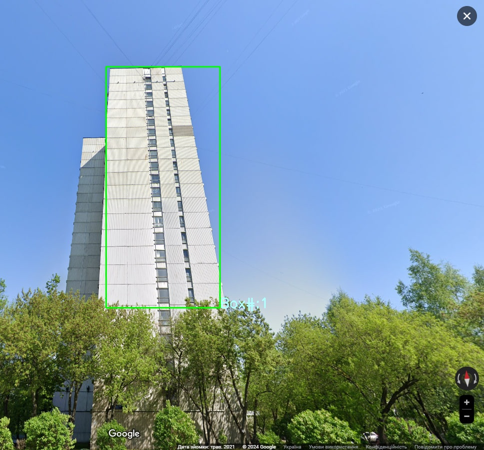

In [92]:
# path = 'D:/LNU/6.2/diploma/program/kornia/one_photo_3.jpg'
path = 'D:/LNU/6.2/diploma/program/kornia/one_photo_2.jpg'
# path = 'D:/LNU/6.2/diploma/program/kornia/one_photo_3.jpg'

img = Photo(path)

# img.Print_path()
# img.Get_xyc()
# img.Show_boxes()
#img.Get_camera_info()
# img.Select_box()
img.Show_boxes()

In [65]:
print((0.0192*(0.105-364.9))/0.105)

-66.70537142857142


In [110]:
# img_1 = Photo('D:/LNU/6.2/diploma/program/kornia/c1.jpg')
# img_2 = Photo('D:/LNU/6.2/diploma/program/kornia/c2.jpg')

# img_1 = Photo('D:/LNU/6.2/diploma/program/runs/detect/predict13/c1.jpg')
# img_2 = Photo('D:/LNU/6.2/diploma/program/runs/detect/predict13/c2.jpg')


# img_1 = Photo('D:/LNU/6.2/diploma/program/kornia/one_photo.jpg')
# img_2 = Photo('D:/LNU/6.2/diploma/program/kornia/one_photo_2.jpg')

# img_1 = Photo('D:/LNU/6.2/diploma/program/runs/detect/predict15/one_photo.jpg')
# img_2 = Photo('D:/LNU/6.2/diploma/program/runs/detect/predict15/one_photo_2.jpg')


# img_1 = Photo('D:/LNU/6.2/diploma/program/kornia/one_photo_boxed.jpg')
img_2 = Photo('D:/LNU/6.2/diploma/program/kornia/one_photo_2_boxed.jpg')
img_3 = Photo('D:/LNU/6.2/diploma/program/kornia/one_photo_3_boxed.jpg')

# img_3 = Photo('D:/LNU/6.2/diploma/program/kornia/15.jpg')


image 1/1 D:\LNU\6.2\diploma\program\kornia\one_photo_2_boxed.jpg: 608x640 2 b_1s, 4 b_2s, 165.0ms
Speed: 7.0ms preprocess, 165.0ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs\detect\predict17
width:   969
height:  900
channel: 3

image 1/1 D:\LNU\6.2\diploma\program\kornia\one_photo_3_boxed.jpg: 640x512 2 b_1s, 2 b_2s, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs\detect\predict17
width:   980
height:  1300
channel: 3


c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\kornia\feature\loftr\utils\coarse_matching.py:254: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  mkpts0_c = torch.stack([i_ids % data["hw0_c"][1], i_ids // data["hw0_c"][1]], dim=1) * scale0
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-p

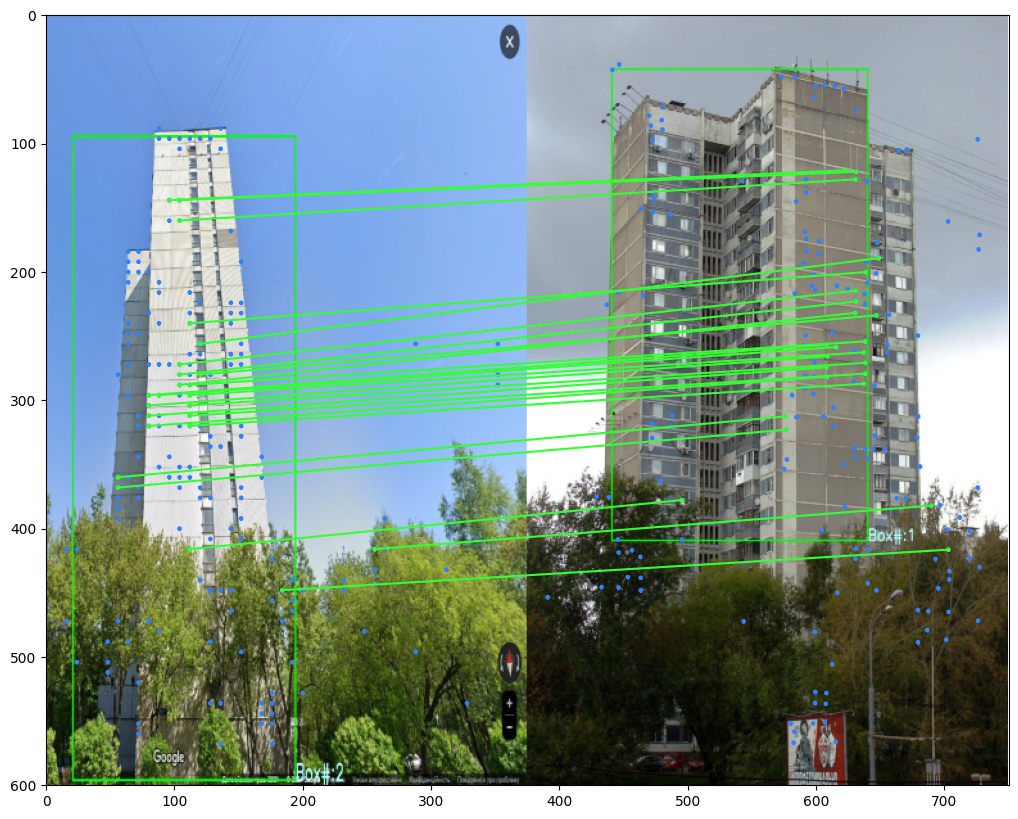

In [109]:
img_arr = [img_2,img_3]
P_list = Photo_list(img_arr)
# P_list.Show_Photo_list()
P_list.Kornia_combine()

In [52]:
# img_arr = [img_1,img_2]
# P_list = Photo_list(img_arr)
# # P_list.Show_Photo_list()
# P_list.Kornia_combine()

In [106]:
im_1 = cv2.imread('D:/LNU/6.2/diploma/program/kornia/one_photo_boxed_crop.jpg')
im_2 = cv2.imread('D:/LNU/6.2/diploma/program/kornia/one_photo_2_boxed_crop.jpg')
im_3 = cv2.imread('D:/LNU/6.2/diploma/program/kornia/one_photo_3_boxed_crop.jpg')

In [112]:
print(Get_shape(im_1))

width:   201
height:  734
channel: 3
(201, 734)


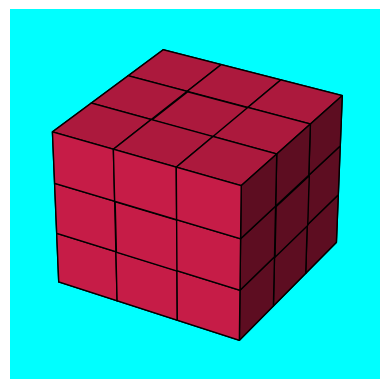

In [117]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
 

cube = np.ones((3,3,3),dtype = 'bool')

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_facecolor("Cyan")
ax.voxels(cube,facecolors="#E02050",edgecolors='k')
ax.axis('off')
plt.show()


# Cornia

In [22]:
import cv2
import kornia as K
import kornia.feature as KF
import matplotlib.pyplot as plt
import numpy as np
import torch
import numpy

from kornia_moons.viz import draw_LAF_matches

In [23]:
def load_torch_image(file_name):
    image = K.image_to_tensor(cv2.imread(file_name), False).float() / 255
    image = K.color.bgr_to_rgb(image)
    return image

def concat_images_h(image1, image2):
    image1 = torchvision.transforms.ToPILImage()(torch.squeeze(image1))
    image2 = torchvision.transforms.ToPILImage()(torch.squeeze(image2))
    concatenated_images = Image.new('RGB', (image1.width + image2.width, image1.height))
    concatenated_images.paste(image1, (0, 0))
    concatenated_images.paste(image2, (image1.width, 0))
    return concatenated_images


In [24]:
# fname1 = "kornia/10.jpg"
# fname2 = "kornia/boxed_image.jpg"

fname1 = 'kornia/one_photo.jpg'
fname2 = 'kornia/one_photo_2.jpg'

img1 = K.io.load_image(fname1, K.io.ImageLoadType.RGB32)[None, ...]
img2 = K.io.load_image(fname2, K.io.ImageLoadType.RGB32)[None, ...]

img1 = K.geometry.resize(img1, (600, 375), antialias=True)
img2 = K.geometry.resize(img2, (600, 375), antialias=True)


matcher = KF.LoFTR(pretrained="outdoor")

input_dict = {
    "image0": K.color.rgb_to_grayscale(img1),  # LofTR works on grayscale images only
    "image1": K.color.rgb_to_grayscale(img2),
}

with torch.inference_mode():
    correspondences = matcher(input_dict)


In [25]:
for k, v in correspondences.items():
    print(k)

keypoints0
keypoints1
confidence
batch_indexes


In [26]:
mask = correspondences['confidence'] > 0.5
indices = torch.nonzero(mask)
correspondences['confidence'] = correspondences['confidence'][indices]
correspondences['keypoints0'] = correspondences['keypoints0'][indices]
correspondences['keypoints1'] = correspondences['keypoints1'][indices]
correspondences['batch_indexes'] = correspondences['batch_indexes'][indices]

In [27]:
mkpts0 = correspondences["keypoints0"].cpu().numpy()
mkpts1 = correspondences["keypoints1"].cpu().numpy()
Fm, inliers = cv2.findFundamentalMat(mkpts0, mkpts1, cv2.USAC_MAGSAC, 0.5, 0.999, 100000)
inliers = inliers > 0

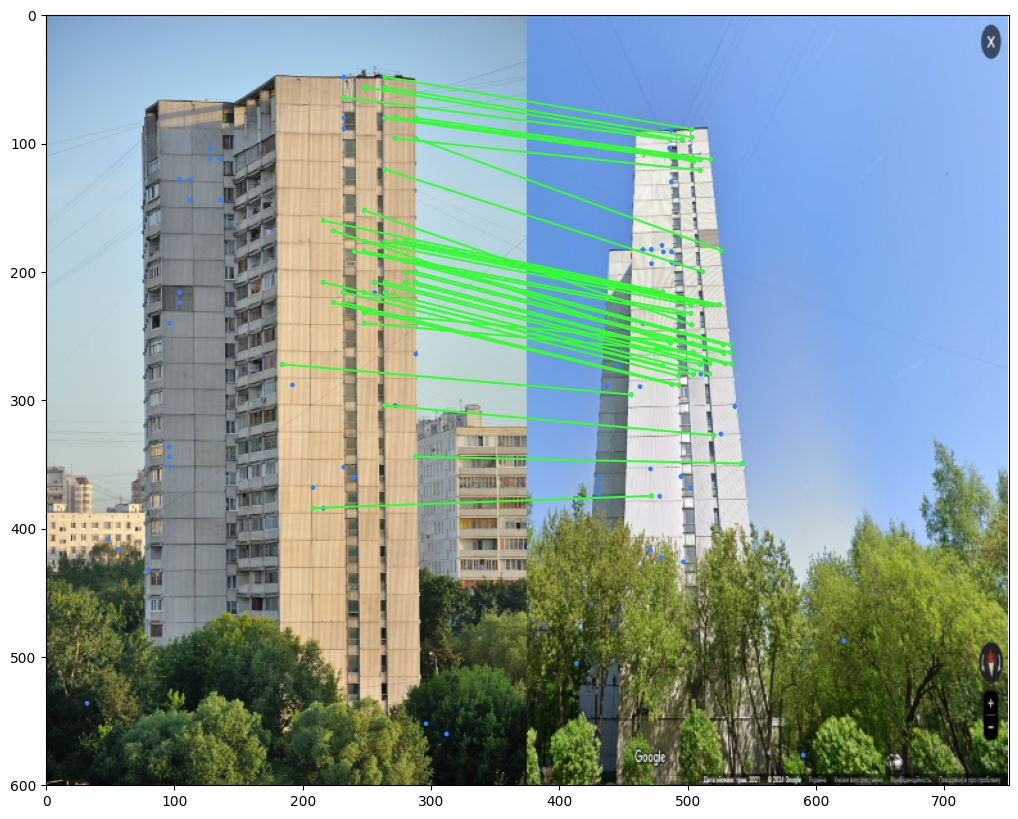

In [28]:
draw_LAF_matches(
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts0).view(1, -1, 2),
        torch.ones(mkpts0.shape[0]).view(1, -1, 1, 1),
        torch.ones(mkpts0.shape[0]).view(1, -1, 1),
    ),
    KF.laf_from_center_scale_ori(
        torch.from_numpy(mkpts1).view(1, -1, 2),
        torch.ones(mkpts1.shape[0]).view(1, -1, 1, 1),
        torch.ones(mkpts1.shape[0]).view(1, -1, 1),
    ),
    torch.arange(mkpts0.shape[0]).view(-1, 1).repeat(1, 2),
    K.tensor_to_image(img1),
    K.tensor_to_image(img2),
    inliers,
    draw_dict={"inlier_color": (0.2, 1, 0.2), "tentative_color": None, "feature_color": (0.2, 0.5, 1), "vertical": False},
)

In [35]:
def given_real_get_pixels(Object_length_meters,Object_width_meters,distance):
    
    Object_width_on_sensor_mms=(Focal_length*Object_width_meters)/distance
    #Object_width_on_sensor_mms2
    Object_width_pixels=(Sensor_width_pixels*Object_width_on_sensor_mms)/Sensor_width_mms

    Object_length_on_sensor_mms=(Focal_length*Object_length_meters)/distance
    Object_length_pixels=(Sensor_length_pixels*Object_length_on_sensor_mms)/Sensor_length_mms
    
    print(f'Object_actual_size={Object_length_meters} x {Object_width_meters}(meters) at {distance}(meters) distance coresponds to Object_pixel_size={Object_length_pixels} x {Object_width_pixels}(pixels)')
    return Object_width_pixels,Object_length_pixels  

#Requires 1)distance from object, 2)Object width in pixels and returns ---> Object_size in meters
def given_pixels_get_real(distance,Object_width_pixels,Object_length_pixels):
    Object_width_on_sensor_mms=(Sensor_width_mms*Object_width_pixels)/Sensor_width_pixels    
    Object_width_meters=((distance*Object_width_on_sensor_mms)/Focal_length)

    Object_length_on_sensor_mms=(Sensor_length_mms*Object_length_pixels)/Sensor_length_pixels
    Object_length_meters=((distance*Object_length_on_sensor_mms)/Focal_length)

    print(f'Object_pixel_size={Object_length_pixels} x {Object_width_pixels}(pixels) at {distance}(meters) distance corresponds to Object_actual_size={Object_length_meters} x {Object_width_meters}(meters)')
    return Object_width_meters,Object_length_meters

def given_real_and_pixels_get_distance(Object_length_meters,Object_width_meters,Object_length_pixels,Object_width_pixels):

    Object_width_on_sensor_mms=(Sensor_width_mms*Object_width_pixels)/Sensor_width_pixels
    distance_width=(Focal_length*Object_width_meters)/Object_width_on_sensor_mms

    Object_length_on_sensor_mms=(Sensor_length_mms*Object_length_pixels)/Sensor_length_pixels
    distance_length=(Focal_length*Object_length_meters)/Object_length_on_sensor_mms
        
    print(f'For obtaining an Object_pixel_size={Object_length_pixels} x {Object_width_pixels}(pixels) of an object that has Object_actual_size={Object_length_meters} x {Object_width_meters}(meters), distance must be distance_length = {distance_length}(meters) and distance_width= {distance_width}(meters) and mean_distance(suggested)={(distance_length+distance_width)/2}(meters) ')
    return distance_length,distance_width

#################################################### Define Specifications ######################################################
#Sensor 
# Sensor_length_mms=7.410 #mm
# Sensor_width_mms=4.980 #mm
# Sensor_length_pixels=3088 #pixels
# Sensor_width_pixels=2076 #pixels

Sensor_length_mms=23.6 #mm
Sensor_width_mms=15.8 #mm
Sensor_length_pixels=4288 #pixels
Sensor_width_pixels=2848 #pixels

#Focal length
# Focal_length=9.6 #mm
Focal_length=10.5 #mm

######################################################### Define Parameters ######################################################
# distance=125 #0.8 # meters
distance=365 #0.8 # meters

################################################# GET OBJECT SIZE IN PIXELS ######################################################

Object_length_meters=0.60
Object_width_meters=0.40 #meters
Object_width_pixels,Object_length_pixels=given_real_get_pixels(Object_length_meters,Object_width_meters,distance)

################################################# GET OBJECT SIZE IN METERS ######################################################
Object_length_pixels=Object_width_pixels=20
Object_width_meters,Object_length_meters=given_pixels_get_real(distance,Object_width_pixels,Object_length_pixels)

########################################### GET DISTANCE TO OBJECT IN METERS ######################################################
Object_length_meters=1
Object_width_meters=1 #meters
Object_length_pixels=100
Object_width_pixels=100

distance_length,distance_width=given_real_and_pixels_get_distance(Object_length_meters,Object_width_meters,Object_length_pixels,Object_width_pixels)

Object_actual_size=0.6 x 0.4(meters) at 365(meters) distance coresponds to Object_pixel_size=3.136104016716972 x 2.0741460031212067(pixels)
Object_pixel_size=20 x 20(pixels) at 365(meters) distance corresponds to Object_actual_size=3.8264036958066807 x 3.8570090957731407(meters)
For obtaining an Object_pixel_size=100 x 100(pixels) of an object that has Object_actual_size=1 x 1(meters), distance must be distance_length = 19.077966101694916(meters) and distance_width= 18.926582278481014(meters) and mean_distance(suggested)=19.002274190087967(meters) 


In [67]:
    # def Count_window(self):
    #     model_window =  YOLO("D:/LNU/6.2/diploma/program/runs/detect/train68/weights/best.pt")
    #     self.window_results = model_window.predict(source=self.path,save = False)
    #     self.window_boxes_arr = []
    #     boxes = self.window_results[0].boxes.xywh.cpu()
    #     for box in boxes:
    #         x,y,w,h = box
    #         t = Box(x,y,w,h)
    #         self.boxes_arr.append(t)
    #     self.Boxes_arr = Bounded_boxes(self.window_boxes_arr)
    #     self.Boxes_arr.Print_bounded_boxes()


    # def Get_boxes_window(self):
    #     self.boxes_arr = []
    #     boxes = self.results[0].boxes.xywh.cpu()
    #     for box in boxes:
    #         x,y,w,h = box
    #         t = Box(x,y,w,h)
    #         self.boxes_arr.append(t)
    #     self.Boxes_arr = Bounded_boxes(self.boxes_arr)
    #     self.Boxes_arr.Print_bounded_boxes()   

    # def Show_boxes_window(self):
    #     model_window =  YOLO("D:/LNU/6.2/diploma/program/runs/detect/train68/weights/best.pt")
    #     self.window_results = model_window.predict(source=self.path,save = False)
    #     color = (255, 0, 0)  # Green color
    #     thickness = 2
    #     self.Get_boxes()
    #     for i in range(len(self.window_Boxes_arr)):
    #         box = self.window_Boxes_arr[i].Get_xywh()
    #         self.abcd = [box[0]-box[2]/2,box[1]-box[3]/2,box[0]+box[2]/2,box[1]+box[3]/2]
            
    #         for j in range(len(self.abcd)):
    #             self.abcd[j] = round(self.abcd[j],5)
    #         self.t_im = self.im

    #         cv2.rectangle(self.t_im,(int(self.abcd[0]),int(self.abcd[1])),(int(self.abcd[2]),int(self.abcd[3])) , color, thickness)
    #         cv2.putText(self.t_im,('Box#:'+str(i+1)),(int(self.abcd[2]),int(self.abcd[3])),cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,175), 2)
    #     cv2.imwrite('D:/LNU/6.2/diploma/program/boxed_image.jpg',self.t_im)
    #     img = Image.open('D:/LNU/6.2/diploma/program/boxed_image.jpg')
    #     display(img.resize((int(img.width*self.scale),int(img.height*self.scale))))


In [ ]:
# results = model.predict(source='D:/LNU/6.2/diploma/program/001100_0.jpg',save = False)

# boxes_arr = []

# boxes = results[0].boxes.xywh.cpu()
# for box in boxes:
#     #x,y - центр бокса, w,h - ширина та висота боксу
#     x, y, w, h = box
#     t = Box(x,y,w,h)
#     boxes_arr.append(t)
#     # print("X center of Box: {}, Y center of Box:{}, Width of Box: {}, Height of Box: {}".format(x,y,w, h))


# Boxes_arr = Bounded_boxes(boxes_arr)

In [ ]:
# img = Image.open('D:/LNU/6.2/diploma/program/001100_0.jpg')
# display(img)

In [ ]:
# results = model('D:/LNU/6.2/diploma/program/test/test_predicted.jpg')
# boxes = results[0].boxes.xyxy.tolist()
# classes = results[0].boxes.cls.tolist()
# names = results[0].names
# confidences = results[0].boxes.conf.tolist()

# # Iterate through the results
# for box, cls, conf in zip(boxes, classes, confidences):
#     x1, y1, x2, y2 = box
#     confidence = conf
#     detected_class = cls
#     name = names[int(cls)]

In [ ]:
# model.train(data=(dir_path + '\\building_Data\\data_main.yaml'), epochs=Epochs, batch=Batch)
# model.train(data='D:/LNU/6.1/Course/Test3/Yolov8_main/content/building_Data/data.yaml', epochs=50, batch=2)